In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt  # Import matplotlib for plotting


In [2]:
# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000
)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Preprocess the data
max_length = 200
train_data = pad_sequences(train_data, maxlen=max_length)
test_data = pad_sequences(test_data, maxlen=max_length)


In [10]:
# 2. Build the Model with Overfitting Reduction Techniques
model = keras.Sequential(
    [
        keras.layers.Embedding(10000, 16),
        keras.layers.GlobalAveragePooling1D(),
        keras.layers.Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)), # L2 Regularization
        keras.layers.Dropout(0.5),  # Dropout Layer
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)


In [11]:
# 3. Compile the Model
model.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
)


In [12]:
# 4. Add Early Stopping
early_stopping_cb = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=3, restore_best_weights=True
)  # Early Stopping


In [13]:
# 5. Train the Model
history = model.fit(
    train_data,
    train_labels,
    epochs=20,  # Increased epochs to allow early stopping to take effect
    batch_size=32,
    validation_data=(test_data, test_labels),
    callbacks=[early_stopping_cb],
)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5987 - loss: 0.6781 - val_accuracy: 0.8322 - val_loss: 0.4669
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8276 - loss: 0.4554 - val_accuracy: 0.8684 - val_loss: 0.3725
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8693 - loss: 0.3807 - val_accuracy: 0.8768 - val_loss: 0.3430
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8887 - loss: 0.3384 - val_accuracy: 0.8794 - val_loss: 0.3289
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9015 - loss: 0.3106 - val_accuracy: 0.8796 - val_loss: 0.3239
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9079 - loss: 0.2899 - val_accuracy: 0.8680 - val_loss: 0.3361
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9181 - loss: 0.2695 - val_accuracy: 0.8733 - val_loss: 0.3266
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9249 - loss: 0.2544 - val_accuracy: 

In [14]:
# 6. Evaluate the Model
loss, accuracy = model.evaluate(test_data, test_labels)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8800 - loss: 0.3239
Test loss: 0.32391294836997986
Test accuracy: 0.8795599937438965


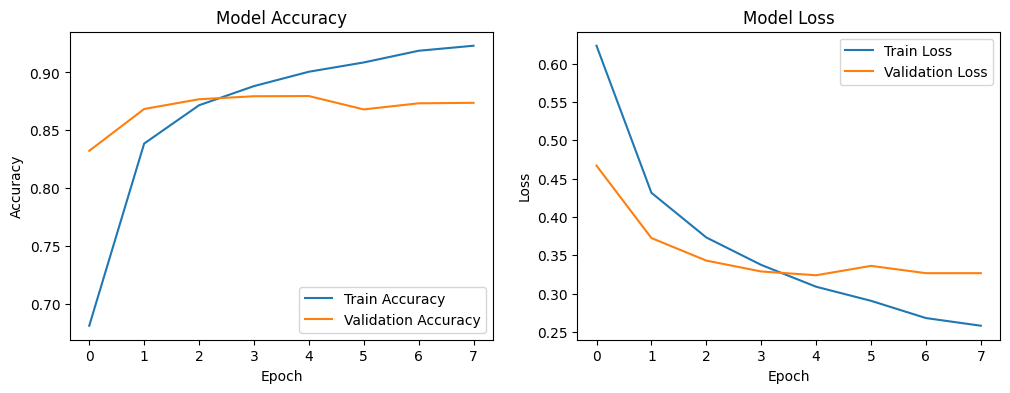

In [15]:
# 7. Visualize training history (Accuracy and Loss)
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper right")

plt.show()